In [1]:
from simulator.Noise_simulator import Operation,DiagonalGate,PauliNoise,Circuit,sample_noisy_IQP_once_streaming_final
from typing import List
import numpy as np


In [ ]:
import numpy as np
import json
from simulator.Noise_simulator import Operation,DiagonalGate,PauliNoise,Circuit,sample_noisy_IQP_once_streaming_final
from typing import List
import numpy as np
with open("RX_exp_sweep_1761111430/gates.json", "r") as f:
    gates_data = json.load(f)
params = np.load("RX_exp_sweep_1761111430/params.npy")
eps_index = []
for i, param in enumerate(params):
    if abs(param) > 0.12:
        eps_index.append(i)
param = params[eps_index]
gates_data = [gates_data[i] for i in eps_index]



from tqdm import tqdm
ops = []
error_rate = 0.02
for i,g in enumerate(gates_data):
    ops.append(DiagonalGate(qubits=tuple(g[0]), angle=param[i]))
    for j in g[0]:
        ops.append(PauliNoise(qubit=j, pI=1-error_rate, pX=error_rate/3, pY=error_rate/3, pZ=error_rate/3))

test = Circuit(n_qubits=45, ops=ops)
sample_list = []

try:
    sample, dbg = sample_noisy_IQP_once_streaming_final(test,shots=1)
    sample_list.append(sample)
except Exception as e:
    print("Error during sampling:", e)

gate  [[0]] angle  0.746378961109802
gate  [[1]] angle  0.649076085863112
gate  [[2]] angle  0.646704318303249
gate  [[3]] angle  0.7753356029826965
gate  [[4]] angle  0.6202439292316735
gate  [[5]] angle  0.7114583625491285
gate  [[6]] angle  0.7353872228781602
gate  [[7]] angle  0.8533823583120249
gate  [[8]] angle  0.6794061326124067
gate  [[9]] angle  0.4763530580836002
gate  [[10]] angle  0.32724255179941686
gate  [[11]] angle  0.5874015208518892
gate  [[12]] angle  0.9604363959973146
gate  [[13]] angle  0.8733041115112494
gate  [[14]] angle  1.0171293284250242
gate  [[15]] angle  0.9472054189545118
gate  [[16]] angle  0.7861335168425767
gate  [[17]] angle  0.6742897340109604
gate  [[18]] angle  0.886819853396076
gate  [[19]] angle  0.6474206530026712
gate  [[20]] angle  0.6685536080435301
gate  [[21]] angle  0.6846984311145538
gate  [[22]] angle  0.8249953422374992
gate  [[23]] angle  0.7475175502672803
gate  [[24]] angle  0.8795990452882143
gate  [[25]] angle  0.8550195432159118

/home/quantum/anaconda3/envs/QCBM_noise/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:597: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/home/quantum/anaconda3/envs/QCBM_noise/lib/python3.10/site-packages/scipy/sparse/linalg/_matfuncs.py:707: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  return spsolve(Q, P)


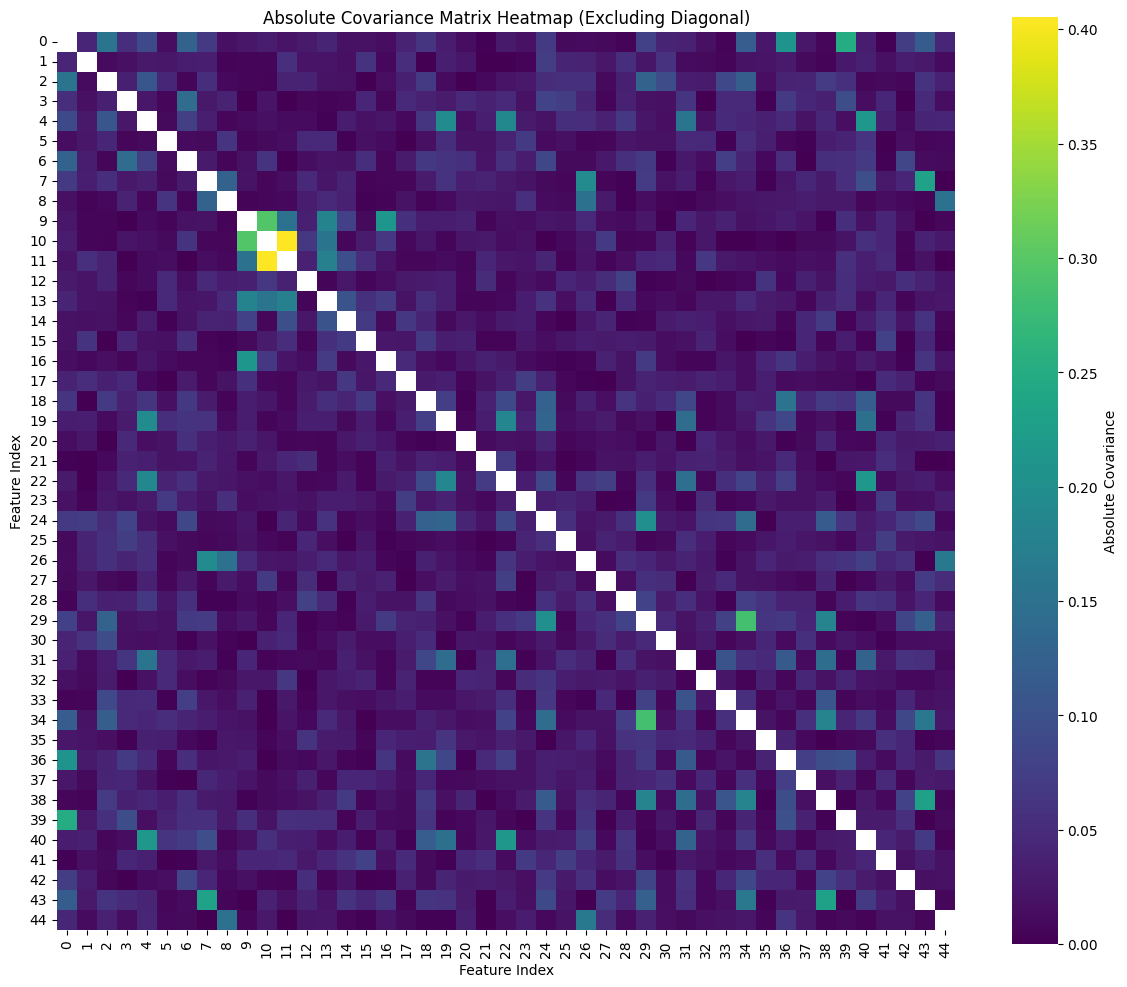

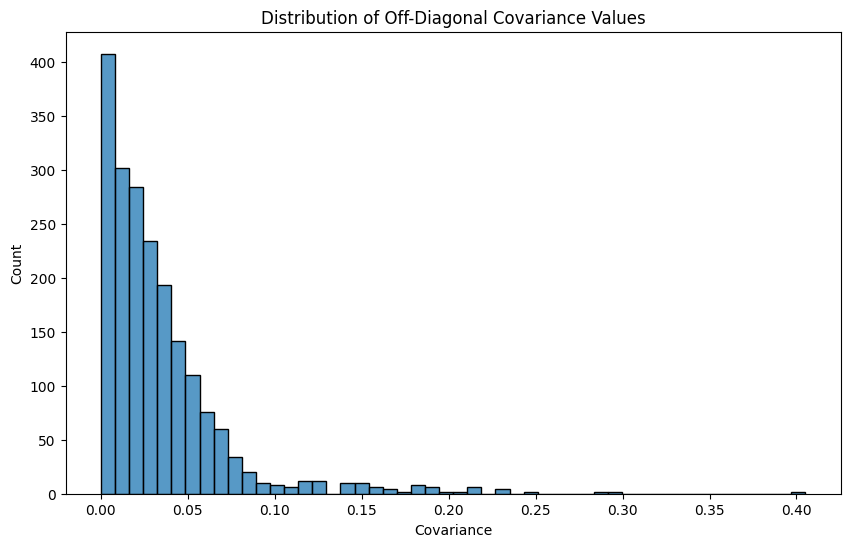

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare data

data_2 = np.array(sample)
#data_2 = np.flip(data_2,axis=1)
data_2 = data_2*2-1
data_2 = data_2.T
matrix = abs(np.cov(data_2))


# Mask diagonal elements
mask = np.eye(matrix.shape[0], dtype=bool)

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(matrix, 
            mask=mask,  # Add mask to hide diagonal
            cmap='viridis',
            square=True,
            annot=False,
            fmt='.2f',
            cbar_kws={'label': 'Absolute Covariance'})
plt.title('Absolute Covariance Matrix Heatmap (Excluding Diagonal)')
plt.xlabel('Feature Index') 
plt.ylabel('Feature Index')
plt.tight_layout()
plt.show()

# Plot distribution of off-diagonal covariance values
plt.figure(figsize=(10, 6))
off_diagonal_values = matrix[~mask]  # Get only off-diagonal elements
sns.histplot(off_diagonal_values, bins=50)
plt.title('Distribution of Off-Diagonal Covariance Values')
plt.xlabel('Covariance')
plt.ylabel('Count')
plt.show()